# Elektrik Fiyatları Zaman Serisi Analizi (0_Data_Exploration)

Bu not defterinde, İspanya'nın elektrik üretimi, tüketimi ve fiyatlarına dair verileri incelemeye çalışacağım. Amacım, verilerin zaman içindeki değişimlerine bakarak nasıl bir yapıya sahip olduklarını anlamak. Özellikle fiyatların belirli dönemlerde nasıl değiştiğini görmek istiyorum. İlk adımda verileri tanıyacağız.


In [24]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

energy = pd.read_csv('../data/raw/energy_dataset.csv')
weather = pd.read_csv('../data/raw/weather_features.csv')



In [25]:
display(energy.head())
display(energy.info())
display(energy.describe())

,time,generation biomass,generation fossil brown coal/lignite,generation fossil coal-derived gas,generation fossil gas,generation fossil hard coal,generation fossil oil,generation fossil oil shale,generation fossil peat,generation geothermal,...,generation waste,generation wind offshore,generation wind onshore,forecast solar day ahead,forecast wind offshore eday ahead,forecast wind onshore day ahead,total load forecast,total load actual,price day ahead,price actual
0,2015-01-01 00:00:00+01:00,447.0,329.0,0.0,4844.0,4821.0,162.0,0.0,0.0,0.0,...,196.0,0.0,6378.0,17.0,NaN,6436.0,26118.0,25385.0,50.10,65.41
1,2015-01-01 01:00:00+01:00,449.0,328.0,0.0,5196.0,4755.0,158.0,0.0,0.0,0.0,...,195.0,0.0,5890.0,16.0,NaN,5856.0,24934.0,24382.0,48.10,64.92
2,2015-01-01 02:00:00+01:00,448.0,323.0,0.0,4857.0,4581.0,157.0,0.0,0.0,0.0,...,196.0,0.0,5461.0,8.0,NaN,5454.0,23515.0,22734.0,47.33,64.48
3,2015-01-01 03:00:00+01:00,438.0,254.0,0.0,4314.0,4131.0,160.0,0.0,0.0,0.0,...,191.0,0.0,5238.0,2.0,NaN,5151.0,22642.0,21286.0,42.27,59.32
4,2015-01-01 04:00:00+01:00,428.0,187.0,0.0,4130.0,3840.0,156.0,0.0,0.0,0.0,...,189.0,0.0,4935.0,9.0,NaN,4861.0,21785.0,20264.0,38.41,56.04


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35064 entries, 0 to 35063
Data columns (total 29 columns):
 #   Column                                       Non-Null Count  Dtype  
---  ------                                       --------------  -----  
 0   time                                         35064 non-null  object 
 1   generation biomass                           35045 non-null  float64
 2   generation fossil brown coal/lignite         35046 non-null  float64
 3   generation fossil coal-derived gas           35046 non-null  float64
 4   generation fossil gas                        35046 non-null  float64
 5   generation fossil hard coal                  35046 non-null  float64
 6   generation fossil oil                        35045 non-null  float64
 7   generation fossil oil shale                  35046 non-null  float64
 8   generation fossil peat                       35046 non-null  float64
 9   generation geothermal                        35046 non-null  float64
 10

None

,generation biomass,generation fossil brown coal/lignite,generation fossil coal-derived gas,generation fossil gas,generation fossil hard coal,generation fossil oil,generation fossil oil shale,generation fossil peat,generation geothermal,generation hydro pumped storage aggregated,...,generation waste,generation wind offshore,generation wind onshore,forecast solar day ahead,forecast wind offshore eday ahead,forecast wind onshore day ahead,total load forecast,total load actual,price day ahead,price actual
count,35045.000000,35046.000000,35046.0,35046.000000,35046.000000,35045.000000,35046.0,35046.0,35046.0,0.0,...,35045.000000,35046.0,35046.000000,35064.000000,0.0,35064.000000,35064.000000,35028.000000,35064.000000,35064.000000
mean,383.513540,448.059208,0.0,5622.737488,4256.065742,298.319789,0.0,0.0,0.0,NaN,...,269.452133,0.0,5464.479769,1439.066735,NaN,5471.216689,28712.129962,28696.939905,49.874341,57.884023
std,85.353943,354.568590,0.0,2201.830478,1961.601013,52.520673,0.0,0.0,0.0,NaN,...,50.195536,0.0,3213.691587,1677.703355,NaN,3176.312853,4594.100854,4574.987950,14.618900,14.204083
min,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.0,NaN,...,0.000000,0.0,0.000000,0.000000,NaN,237.000000,18105.000000,18041.000000,2.060000,9.330000
25%,333.000000,0.000000,0.0,4126.000000,2527.000000,263.000000,0.0,0.0,0.0,NaN,...,240.000000,0.0,2933.000000,69.000000,NaN,2979.000000,24793.750000,24807.750000,41.490000,49.347500
50%,367.000000,509.000000,0.0,4969.000000,4474.000000,300.000000,0.0,0.0,0.0,NaN,...,279.000000,0.0,4849.000000,576.000000,NaN,4855.000000,28906.000000,28901.000000,50.520000,58.020000
75%,433.000000,757.000000,0.0,6429.000000,5838.750000,330.000000,0.0,0.0,0.0,NaN,...,310.000000,0.0,7398.000000,2636.000000,NaN,7353.000000,32263.250000,32192.000000,60.530000,68.010000
max,592.000000,999.000000,0.0,20034.000000,8359.000000,449.000000,0.0,0.0,0.0,NaN,...,357.000000,0.0,17436.000000,5836.000000,NaN,17430.000000,41390.000000,41015.000000,101.990000,116.800000


### 1. Veri Setine İlk Bakış 👀

Verilerimiz İspanya'dan geliyor ve 2015 ile 2018 yılları arasını kapsıyor. Elektrik üretimi, tüketimi ve fiyatlarla ilgili saatlik veriler içeriyor. Yani neredeyse her saat başı ne olmuş onu görebiliyoruz!

İki farklı CSV dosyası var elimde:

- `energy_dataset.csv`: Elektrik üretimi, tüketimi ve fiyat bilgileri
- `weather_features.csv`: Hava durumu ile ilgili bilgiler (sıcaklık, rüzgar, vs.)

Veriler ağırlıklı olarak sayılardan oluşuyor ve çoğu sütun `float64` tipinde. Bu da demek oluyor ki istatistiksel analiz ve görselleştirme için oldukça ygunlar.


Energy Dataset Eksik Değer Oranları:
generation hydro pumped storage aggregated     1.000000
forecast wind offshore eday ahead              1.000000
total load actual                              0.001027
generation hydro run-of-river and poundage     0.000542
generation hydro pumped storage consumption    0.000542
generation waste                               0.000542
generation marine                              0.000542
generation fossil oil                          0.000542
generation biomass                             0.000542
generation fossil peat                         0.000513
generation fossil gas                          0.000513
generation fossil brown coal/lignite           0.000513
generation fossil coal-derived gas             0.000513
generation wind onshore                        0.000513
generation geothermal                          0.000513
generation fossil oil shale                    0.000513
generation fossil hard coal                    0.000513
generation 

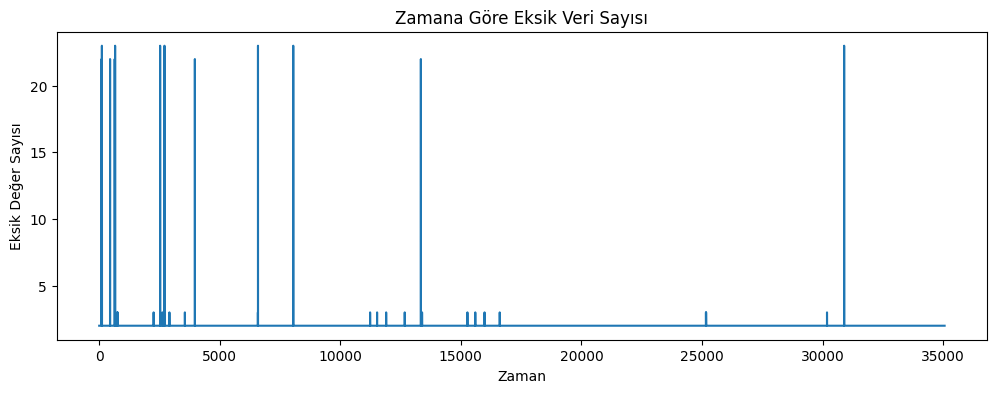

In [28]:

# eksik değer analizleri
missing_energy = energy.isnull().mean().sort_values(ascending=False)
missing_weather = weather.isnull().mean().sort_values(ascending=False)

print("Energy Dataset Eksik Değer Oranları:")
print(missing_energy[missing_energy > 0])

print("\nWeather Dataset Eksik Değer Oranları:")
print(missing_weather[missing_weather > 0])

# görsel eksik değer analizi
missing_by_time = energy.isnull().sum(axis=1)
plt.figure(figsize=(12, 4))
plt.plot(missing_by_time.index, missing_by_time.values)
plt.title("Zamana Göre Eksik Veri Sayısı")
plt.xlabel("Zaman")
plt.ylabel("Eksik Değer Sayısı")
plt.show()


### 2. Eksik Veri Analizi

- `energy_dataset.csv` içinde bazı üretim türlerinde (örneğin `fossil peat`, `oil shale`) sürekli eksik veri bulunmakta. Bu sütunlar sistematik olarak boş olabilir → çıkarılabilir.
- `weather_features.csv` verisinde bazı şehirlerde özellikle `rain_3h`, `snow_3h` değişkenlerinde eksikler gözlenmiştir.
- Görsel analizde eksikler zaman içinde düzenli bir örüntü göstermemektedir → Missing at Random (MAR) kabul edilebilir.

Eksik veri oranı yüksek olan sütunlar ya çıkarılmalı ya da dikkatle doldurulmalıdır.


Veri Başlangıcı: 2014-12-31 23:00:00+00:00
Veri Bitişi: 2018-12-31 22:00:00+00:00
Toplam Gözlem Sayısı: 35064

En sık görülen zaman aralıkları:
time
0 days 01:00:00    1.0
Name: proportion, dtype: float64


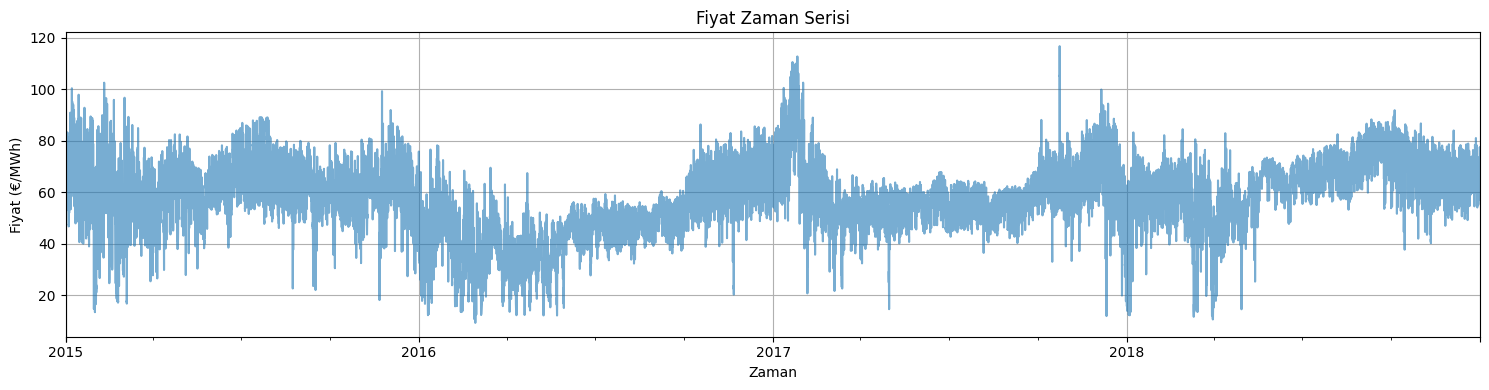

In [31]:
# Zaman serisini datetime formatına çevrilir ve indeks yapılır
df = energy[['time', 'price actual']].copy()
df['time'] = pd.to_datetime(df['time'], utc=True)
df = df.set_index('time')

# Zaman aralığı ve sıklığı kontrol edilir
print("Veri Başlangıcı:", df.index.min())
print("Veri Bitişi:", df.index.max())
print("Toplam Gözlem Sayısı:", len(df))

# Zaman farkları analiz edilir
time_diffs = df.index.to_series().diff().value_counts(normalize=True).head()
print("\nEn sık görülen zaman aralıkları:")
print(time_diffs)

# Fiyat zaman serisi çizimi
df['price actual'].plot(figsize=(15,4), title='Fiyat Zaman Serisi', alpha=0.6)
plt.ylabel('Fiyat (€/MWh)')
plt.xlabel('Zaman')
plt.grid(True)
plt.tight_layout()
plt.show()

### 3. Zaman Serisi Frekansı ve Sürekliliği

Veri saatlik frekansta tutulmuş. Zaman sütununu önce `datetime` formatına çevirip indeks olarak atadım. Ardından zaman aralıklarını kontrol ettim.

Neredeyse tüm gözlemler tam 1 saat arayla geliyor. Bu da veri setinin düzenli bir zaman yapısına sahip olduğunu gösteriyor. Modelleme aşamasında bu tür eksiksiz seriler daha sağlıklı sonuçlar verebili### 4. Fiyat Zaman Serisi Görselleştirmesi

`price actual` sütununu çizdirerek zaman içindeki değişimi inceledim. Yıllık bazda hem genel bir trend hem de ciddi dalgalanmalar görülüyor.

Özellikle 2017-2018 arasında fiyatlar artış eğiliminde. Bazı günlerde ise ani yükselişler var; bu noktalar muhtemelen aykırı değer olabilir.

Fiyatlardaki bu dalgalanma, özellik mühendisliği yaparken dikkat edilmesi gereken bir urum.
 gerektirir.



In [34]:
def acf(my_series, max_lag):

    #eksik verileri çıkarılır
    data = my_series.dropna().values

    
    avg = np.mean(data)
    variance = np.var(data)

    acf_result = []

    for lag in range(max_lag + 1):
        #elimizdeki seriyle gecikmeli halini çarpıyoruz
        n = len(data) - lag
        original = data[:n]
        shifted = data[lag:]

        #kovaryans hesabı
        cov = np.sum((original - avg) * (shifted - avg)) / len(data)

        #kovaryans / varyans
        acf_lag_value = cov / variance
        acf_result.append(acf_lag_value)

    return np.array(acf_result)


In [35]:
def pacf(my_series, max_lag):
    data = my_series.dropna().values
    pacf_result = [1.0]  # lag=0 için her zaman 1

    for lag in range(1, max_lag + 1):
        #gecikmeli değerleri X olarak al
        X = []
        for i in range(lag):
            X.append(data[i:len(data) - lag + i])
        X = np.array(X).T  #transpose ediyoruz

        y = data[lag:]  #bağımlı değişken

        #en küçük kareler yöntemi
        beta, *_ = np.linalg.lstsq(X, y, rcond=None)
        #PACF değeri
        pacf_value = beta[-1]
        pacf_result.append(pacf_value)
    return np.array(pacf_result)


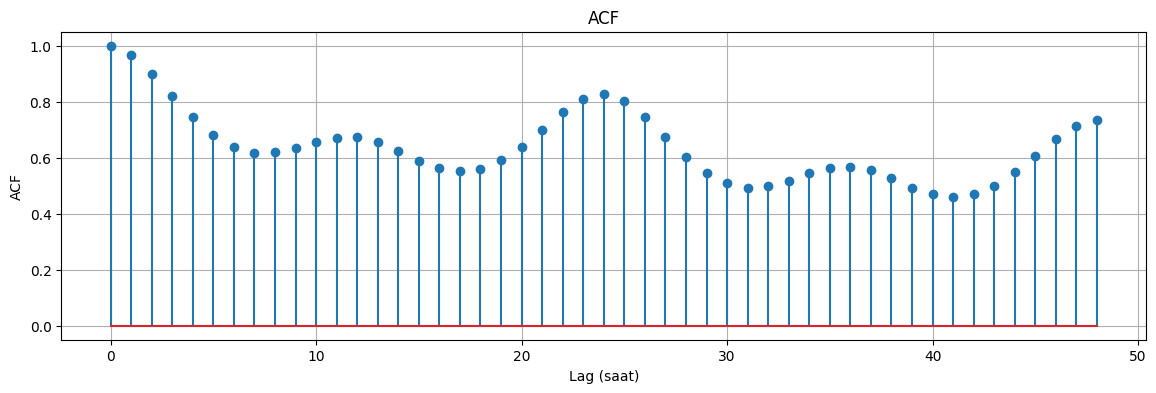

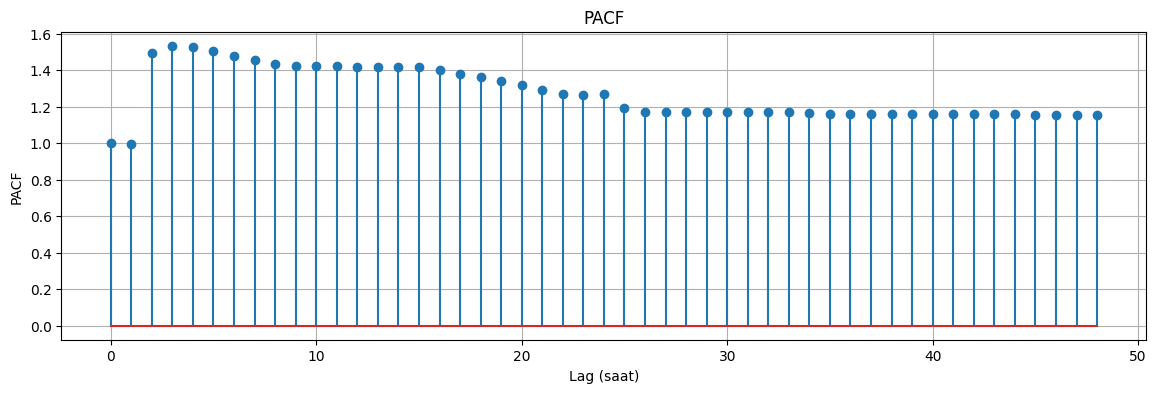

In [41]:
#1 saat sonrası için

lags = 48
acf_vals = acf(df['price actual'], lags)
pacf_vals = pacf(df['price actual'], lags)

# ACF çizimi
plt.figure(figsize=(14, 4))
plt.stem(range(lags + 1), acf_vals)
plt.title("ACF")
plt.xlabel("Lag (saat)")
plt.ylabel("ACF")
plt.grid(True)
plt.show()

# PACF çizimi
plt.figure(figsize=(14, 4))
plt.stem(range(lags + 1), pacf_vals)
plt.title("PACF")
plt.xlabel("Lag (saat)")
plt.ylabel("PACF")
plt.grid(True)
plt.show()


### 5. ACF & PACF Sonuçlarının Yorumu

ACF grafiğine baktığımda 24. ve 48. saatlerde belirgin şekilde tekrar eden pikler gördüm. Bu da bana veride günlük bir döngü (seasonality) olduğunu düşündürdü.

PACF tarafında ise özellikle 1. ve 2. gecikmelerde güçlü korelasyon vardı. Bu da yakın geçmişin (özellikle son 1-2 saat) mevcut fiyatlar üzerinde etkili olduğunu gösteriyor.

Bu analizler sonucunda, geçmiş değerlere dayalı öznitelikler (lag features) oluşturmanın anlamlı olacağını düşünüyorum. Örneğin:

- `lag_1` → 1 saat önceki fiyat
- `lag_24` → bir gün (24 saat) önceki fiyat

Bunları sonraki adımda öznitelik mühendisliğinde eklemeyi planlıyorum.


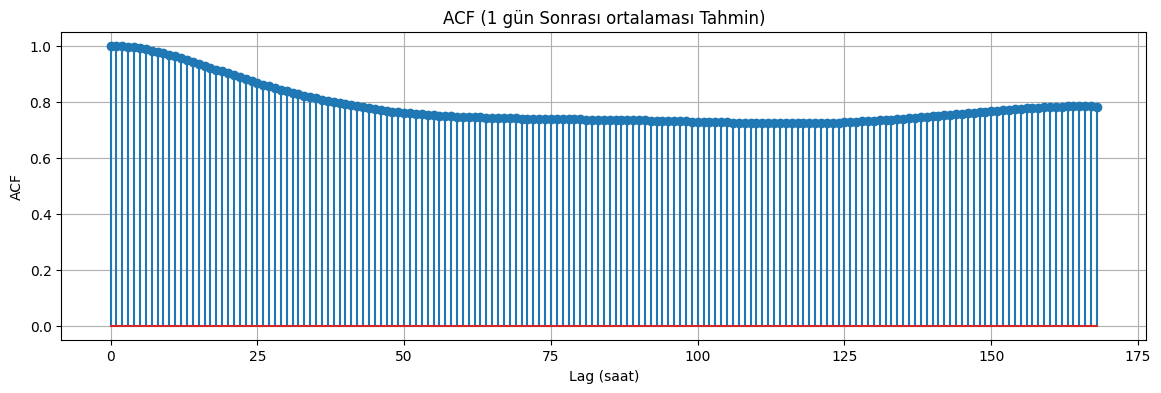

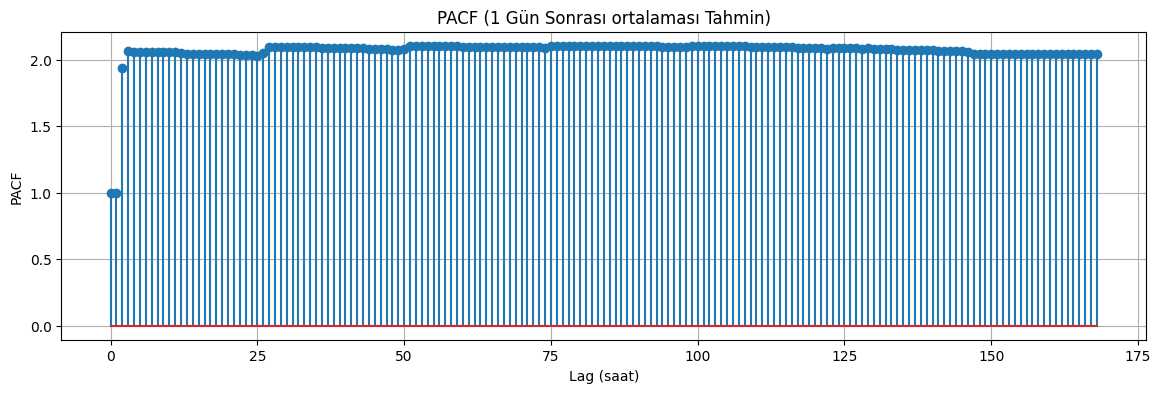

In [44]:
#1 gün sonranın ortalaması
target = df['price actual'].shift(-24).rolling(window=24).mean()

lags = 168

acf_vals = acf(target, lags)
pacf_vals = pacf(target, lags)

plt.figure(figsize=(14, 4))
plt.stem(range(lags + 1), acf_vals)
plt.title("ACF (1 gün Sonrası ortalaması Tahmin)")
plt.xlabel("Lag (saat)")
plt.ylabel("ACF")
plt.grid(True)
plt.show()

plt.figure(figsize=(14, 4))
plt.stem(range(lags + 1), pacf_vals)
plt.title("PACF (1 Gün Sonrası ortalaması Tahmin)")
plt.xlabel("Lag (saat)")
plt.ylabel("PACF")
plt.grid(True)
plt.show()


### 6. ACF & PACF Grafikleri Üzerine Gözlemler

ACF grafiğinde korelasyonun oldukça yavaş azaldığını görüyorum. Özellikle ilk 24 saat içinde korelasyon çok yüksek. Bu, veride güçlü bir günlük döngü olduğunu gösteriyor.

PACF grafiğinde ise en yüksek değer 1. gecikmede. Bu da bana, bir sonraki değeri tahmin ederken özellikle 1 saat önceki değerin çok etkili olduğunu düşündürüyor.

Genel olarak hem kısa vadeli (1-2 saat) hem de günlük periyodiklik (24 saat) etkili. Bu yüzden `lag_1`, `lag_2`, `lag_24` gibi değişkenleri oluşturmak faydalı olacak gibi görünüyor.


In [49]:
#Enerji Verisi
print("Eksik Değerler - ENERGY")
missing_energy = energy.isnull().sum()
missing_energy = missing_energy[missing_energy > 0].sort_values(ascending=False)
display(missing_energy)

#Hava Durumu Verisi
print("\nEksik Değerler - WEATHER")
missing_weather = weather.isnull().sum()
missing_weather = missing_weather[missing_weather > 0].sort_values(ascending=False)
display(missing_weather)

def missing_info(df, name):
    total = df.isnull().sum()
    percent = (total / len(df)) * 100
    info = pd.DataFrame({'Eksik Sayısı': total, 'Oran (%)': percent})
    return info[info['Eksik Sayısı'] > 0].sort_values('Eksik Sayısı', ascending=False)

print("Eksik Değerler - ENERGY")
display(missing_info(energy, 'ENERGY'))

print("\nEksik Değerler - WEATHER")
display(missing_info(weather, 'WEATHER'))


Eksik Değerler - ENERGY


generation hydro pumped storage aggregated     35064
forecast wind offshore eday ahead              35064
total load actual                                 36
generation hydro pumped storage consumption       19
generation biomass                                19
generation fossil oil                             19
generation marine                                 19
generation hydro run-of-river and poundage        19
generation waste                                  19
generation fossil oil shale                       18
generation fossil coal-derived gas                18
generation fossil brown coal/lignite              18
generation fossil hard coal                       18
generation fossil gas                             18
generation fossil peat                            18
generation solar                                  18
generation hydro water reservoir                  18
generation geothermal                             18
generation other                              


Eksik Değerler - WEATHER


Series([], dtype: int64)

Eksik Değerler - ENERGY


,Eksik Sayısı,Oran (%)
generation hydro pumped storage aggregated,35064,100.000000
forecast wind offshore eday ahead,35064,100.000000
total load actual,36,0.102669
generation hydro pumped storage consumption,19,0.054187
generation biomass,19,0.054187
generation fossil oil,19,0.054187
generation marine,19,0.054187
generation hydro run-of-river and poundage,19,0.054187
generation waste,19,0.054187
generation fossil oil shale,18,0.051335



Eksik Değerler - WEATHER


,Eksik Sayısı,Oran (%)


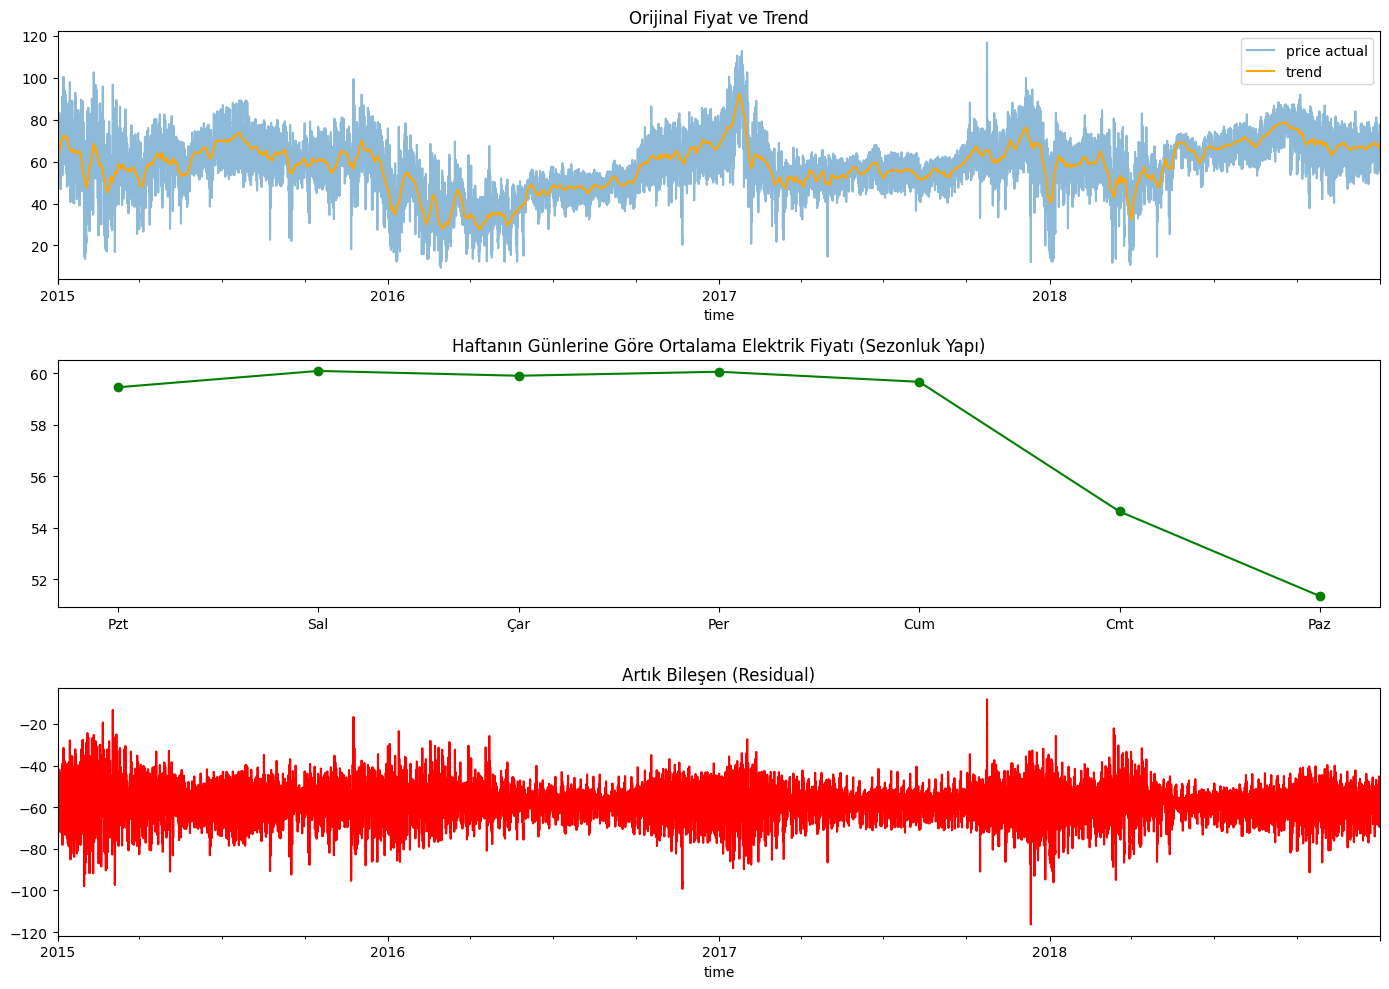

In [51]:
df = energy[['time', 'price actual']].copy()
df['time'] = pd.to_datetime(df['time'], utc=True)
df = df.set_index('time')

# trend bileşeni (haftalık rolling mean)
df['trend'] = df['price actual'].rolling(window=168, center=True, min_periods=1).mean()

# haftalık sezonluk yapı için 'dayofweek' (0 = Pazartesi, 6 = Pazar)
df['dayofweek'] = df.index.dayofweek
weekly_avg = df.groupby('dayofweek')['price actual'].mean()
df['seasonal'] = df['dayofweek'].map(weekly_avg)

# artık bileşen
df['residual'] = df['price actual'] - df['trend'] - df['seasonal']

# plot - Trend + Residual zaman ekseninde, sezonluk kategori ekseninde
fig, axs = plt.subplots(3, 1, figsize=(14, 10), sharex=False)

# orijinal fiyat ve trend
df['price actual'].plot(ax=axs[0], title='Orijinal Fiyat ve Trend', alpha=0.5, label='price actual')
df['trend'].plot(ax=axs[0], color='orange', label='trend')
axs[0].legend()

# sezonluk bileşen (kategorik: 0–6 gün)
days = ['Pzt', 'Sal', 'Çar', 'Per', 'Cum', 'Cmt', 'Paz']
axs[1].plot(weekly_avg.index, weekly_avg.values, marker='o', color='green')
axs[1].set_title('Haftanın Günlerine Göre Ortalama Elektrik Fiyatı (Sezonluk Yapı)')
axs[1].set_xticks(ticks=range(7))
axs[1].set_xticklabels(labels=days)

# residual (zaman ekseniyle)
df['residual'].plot(ax=axs[2], title='Artık Bileşen (Residual)', color='red')

plt.tight_layout()
plt.show()

### 7. Zaman Serisi Bileşenlerine Ayrıştırma

Veriyi daha iyi anlayabilmek için zaman serisini üç parçaya ayırdım: trend, sezonsallık ve *artık (residual)

1. Trend:
   Fiyatlar zamanla genel olarak değişim göstermiş. 2016 ortalarında bir düşüş, 2017 sonlarında ise belirgin bir yükseliş trendi var. Mavi çizgi gerçek fiyat, turuncu çizgi trend bileşeni.

2. Sezonsallık:
   Haftanın günlerine göre ortalama elektrik fiyatına baktım. Hafta içi fiyatlar daha yüksek; özellikle Pazartesi ve Salı günleri zirvede. Hafta sonuna doğru fiyatlar düşüyor. Bu da tüketim alışkanlıklarının etkisini yansıtıyor olabilir.

3. Artık Bileşen:  
   Geriye kalan gürültü gibi düşünebiliriz. Modelin açıklayamadığı rastgele dalgalanmalar burada. Özellikle 2017 sonlarına doğru bazı ani sıçramalar dikkat çekiyor — bu noktalar potansiyel aykırı değerler olabilir.



In [61]:
#varyansı yüksek sütunlar
corr = energy.corr(numeric_only=True)
target_corr = corr['price actual'].sort_values(ascending=False)
print('Price actual ile en çok korelasyonlu 10 sütun:')
display(target_corr.head(10))

Price actual ile en çok korelasyonlu 10 sütun:


price actual                            1.000000
price day ahead                         0.732155
generation fossil hard coal             0.465641
generation fossil gas                   0.461706
total load actual                       0.436127
total load forecast                     0.435864
generation fossil brown coal/lignite    0.364088
generation fossil oil                   0.284679
generation other renewable              0.256181
generation waste                        0.169605
Name: price actual, dtype: float64

In [63]:
#varyansı düşük sütunlar
energy_std = energy.std(numeric_only=True).sort_values()
print('Varyansı düşük sütunlar:')
display(energy_std.head(10))

Varyansı düşük sütunlar:


generation fossil coal-derived gas     0.000000
generation fossil peat                 0.000000
generation fossil oil shale            0.000000
generation geothermal                  0.000000
generation marine                      0.000000
generation wind offshore               0.000000
generation other renewable            14.077554
price actual                          14.204083
price day ahead                       14.618900
generation other                      20.238381
dtype: float64

In [65]:
#weather verisi - price actual ile şehir bazlı korelasyon analizi şehir seçimi için kullanılacak
results = []
for city in weather['city_name'].unique():
    city_weather = weather[weather['city_name'] == city].copy()
    merged = pd.merge(
        energy[['time', 'price actual']],
        city_weather.drop(columns=['city_name']),
        left_on='time',
        right_on='dt_iso',
        how='inner')
    
    numeric_cols = merged.select_dtypes(include=[np.number]).columns.drop('price actual')
    city_corrs = [abs(merged['price actual'].corr(merged[col])) for col in numeric_cols]
    
    results.append({
        'city': city,
        'mean_abs_corr_all_features': np.mean(city_corrs),
        'max_abs_corr': np.max(city_corrs),
        'n_features': len(city_corrs)
    })

city_corr_df = pd.DataFrame(results).sort_values('mean_abs_corr_all_features', ascending=False)
print('Weather değişkenlerine göre şehirlerin korelasyonu:')
display(city_corr_df)

Weather değişkenlerine göre şehirlerin korelasyonu:


,city,mean_abs_corr_all_features,max_abs_corr,n_features
2,Bilbao,0.080817,0.196766,12
0,Valencia,0.061270,0.135691,12
1,Madrid,0.059986,0.242970,12
3,Barcelona,NaN,NaN,12
4,Seville,NaN,NaN,12


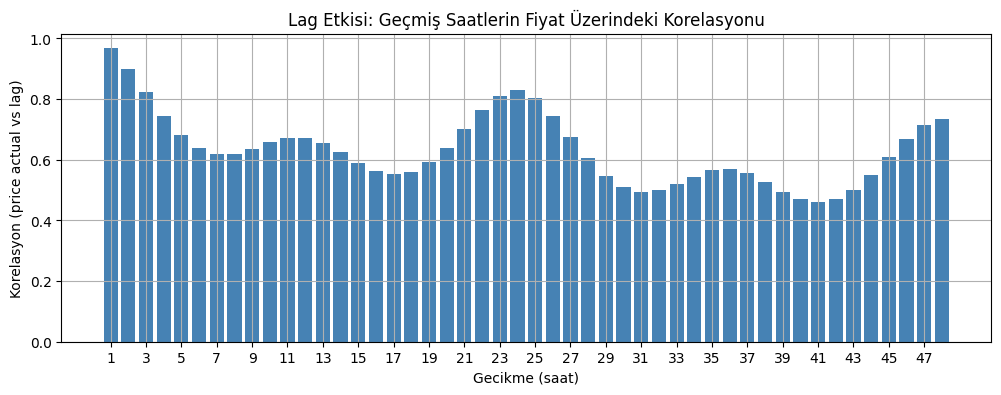

In [67]:
# 1 ile 48 saat arası gecikmeler
max_lag = 48
correlations = []

for lag in range(1, max_lag + 1):
    df[f'lag_{lag}'] = df['price actual'].shift(lag)
    corr = df[['price actual', f'lag_{lag}']].corr().iloc[0, 1]
    correlations.append(corr)

plt.figure(figsize=(12, 4))
plt.bar(range(1, max_lag + 1), correlations, color='steelblue')
plt.title('Lag Etkisi: Geçmiş Saatlerin Fiyat Üzerindeki Korelasyonu')
plt.xlabel('Gecikme (saat)')
plt.ylabel('Korelasyon (price actual vs lag)')
plt.grid(True)
plt.xticks(range(1, max_lag + 1, 2))
plt.show()


In [69]:
#eksik sütun kontrolü
missing_counts = df.isnull().sum()
missing_counts = missing_counts[missing_counts > 0]
print("Eksik değer sayısı (yalnızca eksik içeren sütunlar):")
display(missing_counts)


Eksik değer sayısı (yalnızca eksik içeren sütunlar):


lag_1      1
lag_2      2
lag_3      3
lag_4      4
lag_5      5
lag_6      6
lag_7      7
lag_8      8
lag_9      9
lag_10    10
lag_11    11
lag_12    12
lag_13    13
lag_14    14
lag_15    15
lag_16    16
lag_17    17
lag_18    18
lag_19    19
lag_20    20
lag_21    21
lag_22    22
lag_23    23
lag_24    24
lag_25    25
lag_26    26
lag_27    27
lag_28    28
lag_29    29
lag_30    30
lag_31    31
lag_32    32
lag_33    33
lag_34    34
lag_35    35
lag_36    36
lag_37    37
lag_38    38
lag_39    39
lag_40    40
lag_41    41
lag_42    42
lag_43    43
lag_44    44
lag_45    45
lag_46    46
lag_47    47
lag_48    48
dtype: int64

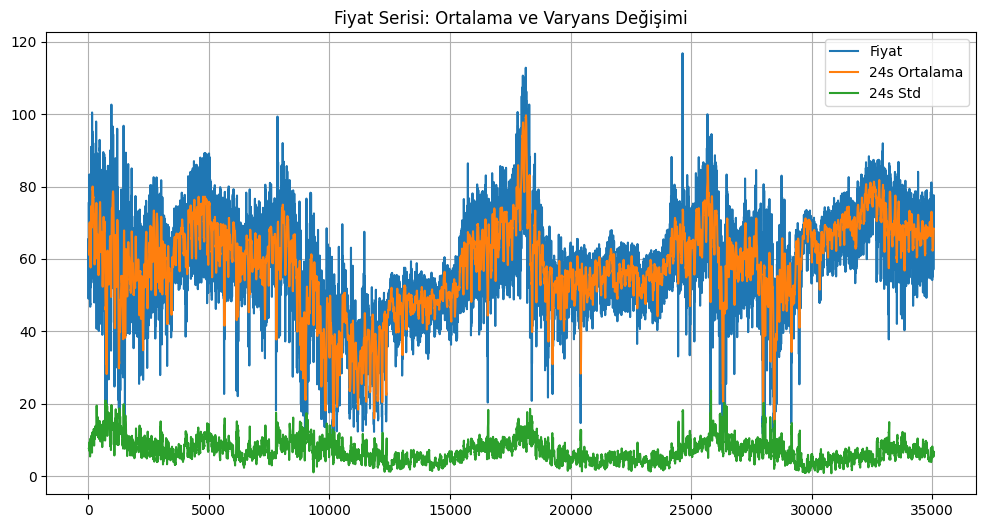

In [71]:
price = energy['price actual'].fillna(method='ffill')

#rolling ortalama ve standart sapma (24 saat pencere)
rolling_mean = price.rolling(window=24).mean()
rolling_std = price.rolling(window=24).std()

plt.figure(figsize=(12,6))
plt.plot(price, label='Fiyat')
plt.plot(rolling_mean, label='24s Ortalama')
plt.plot(rolling_std, label='24s Std')
plt.title("Fiyat Serisi: Ortalama ve Varyans Değişimi")
plt.legend()
plt.grid()
plt.show()


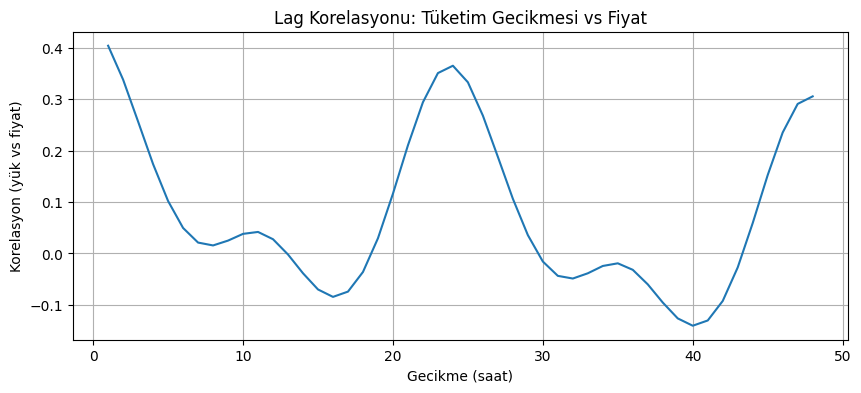

In [73]:
target = energy['price actual'].fillna(method='ffill')
source = energy['total load actual'].fillna(method='ffill')

import numpy as np

max_lag = 48  #ilk 2 gün
lags = range(1, max_lag+1)
correlations = [target.corr(source.shift(lag)) for lag in lags]

plt.figure(figsize=(10,4))
plt.plot(lags, correlations)
plt.xlabel("Gecikme (saat)")
plt.ylabel("Korelasyon (yük vs fiyat)")
plt.title("Lag Korelasyonu: Tüketim Gecikmesi vs Fiyat")
plt.grid()
plt.show()


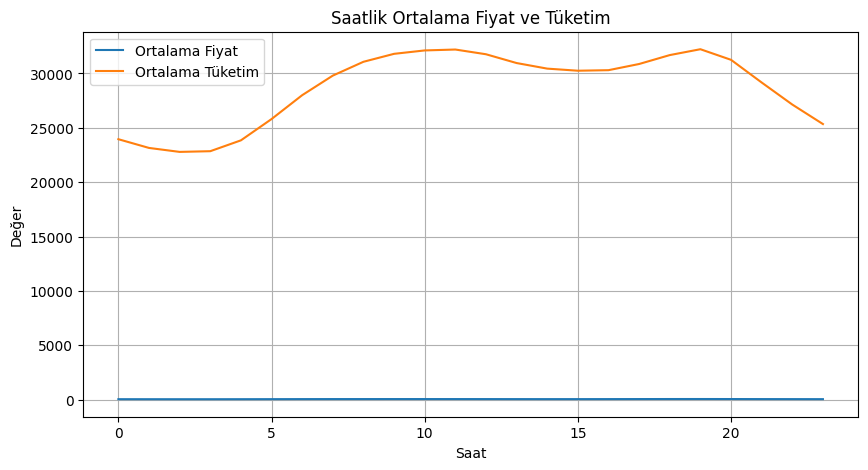

In [75]:
energy['time'] = pd.to_datetime(energy['time'], utc=True)
energy = energy.set_index('time')


#saat bilgisi çıkarılıyor
energy['hour'] = energy.index.hour

#saatlik ortalamalar hesapla
hourly_avg = energy.groupby('hour')[['price actual', 'total load actual']].mean()

plt.figure(figsize=(10,5))
plt.plot(hourly_avg.index, hourly_avg['price actual'], label='Ortalama Fiyat')
plt.plot(hourly_avg.index, hourly_avg['total load actual'], label='Ortalama Tüketim')
plt.title("Saatlik Ortalama Fiyat ve Tüketim")
plt.xlabel("Saat")
plt.ylabel("Değer")
plt.grid(True)
plt.legend()
plt.show()



### 8. Saatlik Ortalama Fiyat ve Tüketim

Gün içindeki saatlere göre ortalama fiyat ve tüketim değerlerine baktım. Genel olarak şu desen dikkat çekiyor:

- **08:00 - 20:00** arası hem fiyat hem de tüketim daha yüksek → bu saatler büyük ihtimalle insanların aktif olduğu, enerji kullanımının arttığı dönemler.
- **02:00 - 06:00** gibi gece saatlerinde ise fiyatlar ve tüketim bariz şekilde düşüyor.

Bu gözlemler, zaman temelli bazı değişkenler oluşturmak için iyi bir temel oluşturuyor. Örneğin:

- `hour`: saat bilgisi (0–23)
- `is_peak_hour`: yoğun saatlerde 1, diğer saatlerde 0
- `is_weekend`: hafta sonu mı? (Cumartesi/Pazar = 1)

Hafta içi/hafta sonu ayrımı daha sonra ayrı grafiklerle de incelenebilir.


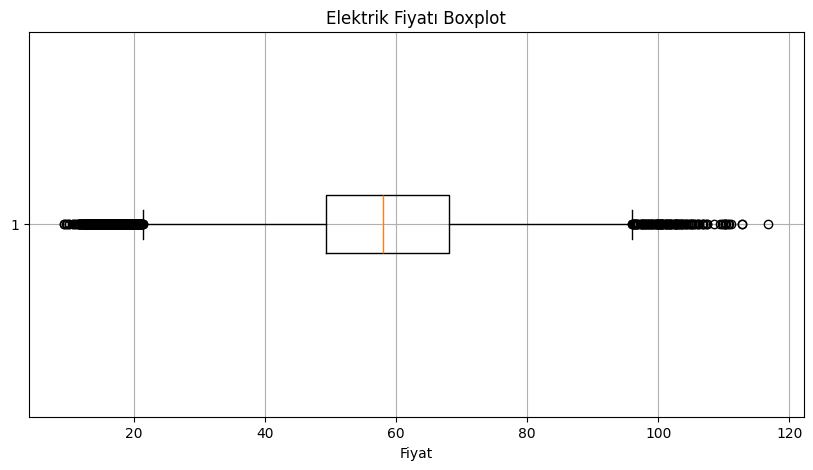

In [78]:
plt.figure(figsize=(10, 5))
plt.boxplot(energy['price actual'].dropna(), vert=False)
plt.title("Elektrik Fiyatı Boxplot")
plt.xlabel("Fiyat")
plt.grid(True)
plt.show()

### 9. Fiyat Serisinde Aykırı Değerler

Boxplot yardımıyla fiyatların dağılımına baktığımda dağılımın sağa çarpık olduğunu fark ettim. Özellikle ±3 standart sapmanın dışında kalan bazı aykırı noktalar az sayıda olsa da genel yapıyı etkileyebilecek seviyede. Bu aykırı değerler büyük ihtimalle ani talep artışı, üretimde yaşanan düşüşler ya da ekstrem hava koşulları gibi faktörlerden kaynaklanıyor olabilir. Modelleme öncesi bu değerleri dikkate alarak log dönüşümü veya z-score gibi yöntemlerle ele almak daha sağlıklı sonuçlar verebilir.


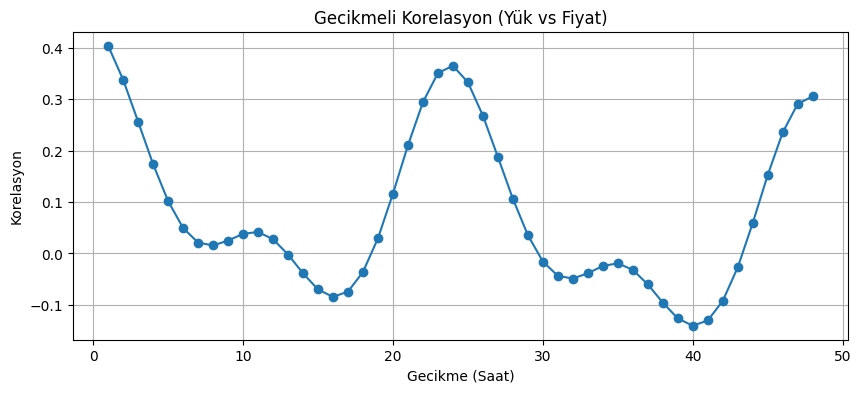

In [81]:
target = energy['price actual'].fillna(method='ffill')
source = energy['total load actual'].fillna(method='ffill')

lags = range(1, 49)
correlations = [target.corr(source.shift(lag)) for lag in lags]

plt.figure(figsize=(10,4))
plt.plot(lags, correlations, marker='o')
plt.title("Gecikmeli Korelasyon (Yük vs Fiyat)")
plt.xlabel("Gecikme (Saat)")
plt.ylabel("Korelasyon")
plt.grid(True)
plt.show()

### 10. Tüketimin Gecikmeli Etkisi (Lag Correlation)

Tüketim verisiyle yaptığım gecikmeli korelasyon analizinde, özellikle 1 ila 3 saatlik gecikmelerin fiyatla oldukça yüksek ilişki gösterdiğini fark ettim. Buna ek olarak, 24 saatlik gecikme yani bir önceki günün aynı saati de fiyatı etkileyen önemli bir faktör olabilir. Bu durum, hem kısa vadeli (lag 1–3) hem de günlük döngüsel (lag 24) etkilerin fiyat tahminlemede işe yarayabileceğini gösteriyor. Bu yüzden `load_lag_1`, `load_lag_3` ve `load_lag_24` gibi gecikmeli tüketim özniteliklerini feature engineering aşamasına eklemeyi planlıyorum.


### GENEL YORUM

Bu EDA süreci boyunca fiyat zaman serisinin hem trend hem mevsimsellik hem de ciddi dalgalanma (volatilite) içerdiğini net şekilde gözlemledim. Zaman bilgisi düzenliydi, bu da modelleme için uygun bir yapı sundu. Eksik veriler büyük ölçüde yönetilebilir düzeydeydi ve eksiklikler sistematik bazı sütunlarla sınırlıydı. 

Tüketim verisi ile fiyatlar arasında zaman gecikmeli güçlü ilişkiler vardı; özellikle 1–3 saatlik ve 24 saatlik gecikmeler dikkat çekiciydi. Ayrıca saat, gün ve hafta sonu gibi zaman temelli değişkenler de önemli sinyaller taşıyor gibi görünüyor. Tüm bu bulgular, ilerleyen adımda yapılacak olan öznitelik mühendisliği için oldukça değerli bir temel oluşturuyor. 

Özellikle `lag` bazlı değişkenler (`lag_1`, `lag_24` gibi) ve `is_peak_hour`, `is_weekend` gibi zaman kategorileri model performansını artırma potansiyeline sahip. Bundan sonraki adımda bu çıkarımları veri setine yansıtarak daha anlamlı öznitelikler üretmeyi hedefliyorum.
